In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv(Path('resources/crypto_data.csv'))
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
df.rename(columns={'Unnamed: 0':'CoinTicker'}, inplace=True)
df



,CoinTicker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinTicker       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [6]:
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
df = df[df['IsTrading'] == True]
df

,CoinTicker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
df = df.drop(['IsTrading'], axis=1)
df

,CoinTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
df.isnull().sum()

CoinTicker           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

CoinTicker         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [11]:
df

,CoinTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
df = df[df['TotalCoinsMined'] > 0]
df

,CoinTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [13]:
df = df.drop(['CoinTicker', 'CoinName'], axis=1)
df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [15]:
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [16]:
df['TotalCoinSupply'] = df['TotalCoinSupply'].astype(float)
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [17]:
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()

df[df_cat].nunique()

Algorithm    71
ProofType    25
dtype: int64

In [18]:
dummy_df = pd.get_dummies(df)
dummy_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummy_df.columns

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

In [20]:
scaled_df = MinMaxScaler().fit_transform(dummy_df)
print(scaled_df[0:5])

[[0.00000000e+00 4.20000000e-11 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

In [22]:
pca = PCA(n_components=0.90)

principal_components = pca.fit_transform(scaled_df)

print(f'Original Shape: {scaled_df.shape}')
print(f'Dimensionally Reduced Shape: {principal_components.shape}')
print(f'Explained Variance: {pca.explained_variance_.sum()}')
result = tuple(map(lambda i, j: i - j, scaled_df.shape, principal_components.shape))
(rows, features) = result
print(f'Features Removed: {features}')

Original Shape: (532, 98)
Dimensionally Reduced Shape: (532, 28)
Explained Variance: 1.372472635475051
Features Removed: 70


In [24]:
pca_df = pd.DataFrame(data=principal_components)
pca_df.head()



,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.818637,-0.679241,-0.029655,-0.026442,0.003961,-0.021317,0.036198,-0.036825,-0.008006,0.015627,...,-0.008140,4.366295e-07,-4.525064e-17,3.719213e-16,-0.001960,-0.006324,-0.020447,0.009576,-0.005601,-0.001513
1,0.818633,-0.679242,-0.029654,-0.026450,0.003934,-0.021243,0.036267,-0.036775,-0.008027,0.015620,...,-0.007403,-2.752993e-07,-7.660380e-17,3.437576e-16,-0.001764,-0.006128,-0.020635,0.009592,-0.005627,-0.001420
2,0.756313,0.226039,-0.357200,-0.305925,-0.409858,-0.196677,-0.363641,0.700611,-0.250646,-0.054169,...,0.174234,8.881527e-05,7.274640e-16,-3.440629e-15,0.047517,0.040196,-0.044609,0.003901,0.000682,0.024190
3,-0.706987,0.247124,-0.272629,-0.607865,0.634856,-0.011515,-0.018222,0.021506,-0.026898,-0.026525,...,-0.004238,2.117135e-06,4.125438e-17,-1.672941e-16,0.000396,-0.002214,0.019534,-0.000514,0.007319,-0.000053
4,-0.701023,0.138647,-0.207299,-0.102160,-0.229490,-0.009397,-0.166562,-0.098807,0.045642,-0.127762,...,-0.001528,-8.191028e-07,-5.745563e-17,1.727435e-16,0.000210,-0.003520,-0.009804,-0.011354,0.015906,0.000248


In [25]:
tsne = TSNE(learning_rate=78)

tsne_features = tsne.fit_transform(principal_components)

tsne_features.shape



(532, 2)

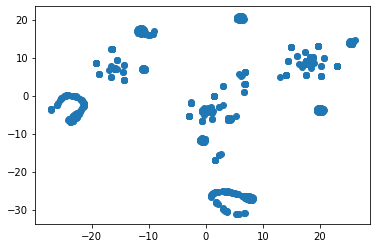

In [26]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [27]:
inertia = []
k = list(range(1, 11))


for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)


elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,219920.156250
1,2,124566.023438
2,3,54965.519531
3,4,35702.066406
4,5,22936.644531


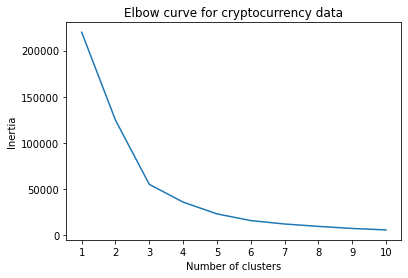

In [28]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for cryptocurrency data')
plt.show()

In [30]:
model = KMeans(n_clusters=3, random_state=5)

model.fit(pca_df)

labels = model.labels_


In [31]:
predictions = model.predict(pca_df)
print(predictions)

[1 1 1 0 0 0 1 0 0 0 2 0 1 2 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 2 1 0 0 0 0 0 1 2 0 1 0 0 0 0 1 0 0 2 0 1 2 1 0 0 0 1 1 1 1 1 0
 0 0 2 1 0 2 0 2 1 0 0 0 0 1 1 0 1 0 0 1 2 0 1 1 0 0 2 2 0 1 1 0 2 0 1 0 2
 0 1 1 0 0 2 0 0 0 1 0 0 0 0 0 1 2 0 0 0 1 0 2 0 0 2 0 1 0 1 1 0 0 1 0 0 1
 1 0 1 0 1 1 2 0 0 0 0 1 2 1 1 2 0 0 1 1 1 1 1 0 2 1 1 1 2 0 2 2 1 1 0 1 0
 1 1 0 1 0 2 0 1 0 1 2 1 1 0 2 2 1 2 1 0 0 2 1 0 0 1 1 2 1 1 0 2 1 1 1 2 1
 1 1 0 1 2 1 1 2 1 0 0 0 1 1 1 1 0 1 0 2 1 0 2 0 0 1 0 0 2 0 1 1 1 0 2 1 0
 2 1 1 1 1 2 1 0 2 0 2 1 1 2 0 2 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 2 0 1 0 1 2 2 0 2 0 0 0 0 0 1 1 0 2 2 1 0 1 0 1 0 2 0 1 1 1 1 0 1 1 0 2 1
 2 0 0 0 0 1 2 1 1 0 1 0 0 0 2 2 0 0 1 1 0 1 0 0 0 2 0 0 1 1 2 0 0 0 2 2 1
 0 0 1 0 0 0 0 2 2 2 0 0 0 1 2 1 1 2 2 0 0 0 0 1 1 1 0 2 0 2 2 1 2 0 1 2 0
 2 1 0 0 2 0 2 0 0 0 0 1 2 0 1 0 1 2 1 2 2 2 0 0 0 1 2 1 2 1 2 0 1 0 0 0 0
 2 1 2 2 0 1 2 0 1 2 0 2 0 2 0 0 2 2 0 1 0 0 2 0 0 1 0 1 0 2 1 0 2 1 1 1 1
 0 0 0 1 2 1 0 1 0 1 0 1 

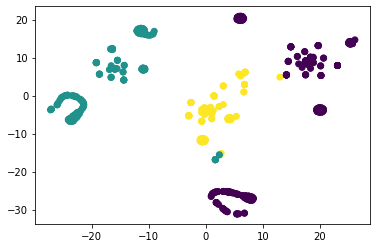

In [32]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()